# Ronchi Grating Optics Calculation
====================================================

- Sylvie Dagoret-Campagne
- January 10th 2017


SageMath using jupyter : sagemath must be installed on your computer

To lauch that sheet do in shell

sage -n jupyter



## Goal
----------

The goal of this Sagemath Jupyter worksheet is the calculation of the dispersive pattern of the Ronchi Grating.
One has to specify the parameters of the pattern.
We know the dispersion law of the light intensity is done according the law:

$$
I(\theta) = \frac{I_0}{N^2} \left( \frac{\sin \beta}{\beta} \right)^2 \cdot \left( \frac{\sin N \alpha}{\sin \alpha} \right)^2
$$

where
$$
\begin{array} {ccc}
\alpha & = & \frac{\pi a }{\lambda} \sin \theta \\
\beta & = & \frac{\pi b }{\lambda} \sin \theta
\end{array}
$$
- $\theta$ is the angle of dispersion
- $\lambda$ is the wavelength
- $a$ is the line groove pitch of Ronchi grating
- $b$ is the line width of Ronchi Gration


## Definitions of Ronchi Grating parameters
-----------------------------------------------------

- Grating 200 lines per mm

In [25]:
r=200 # number of lines per mm
a0=10^-3/r  # line spacing in meter unit

In [26]:
#dd=0.0508 # size of Ronchi Grating in meter
dd=0.00508 # size of Ronchi Grating in meter  Too small number done on purpose
NN=dd/a0   # total number of lines

In [27]:
b0=a0/2 # line width in meter unit

## Selection of the wavelength
--------------------------------------

In [28]:
wl0=600e-9 # default wavelength in meter
wl1=800e-9 # default wavelength in meter
wl2=1000e-9 # default wavelength in meter
wl3=400e-9 # default wavelength in meter

### simple check of plotting functions à la sagemath fashion

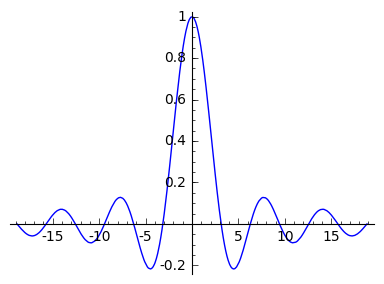

In [29]:
plot(sin(x)/x,-6*pi,6*pi,figsize=4)

In [30]:
def sinc(x): return sin(x)/x

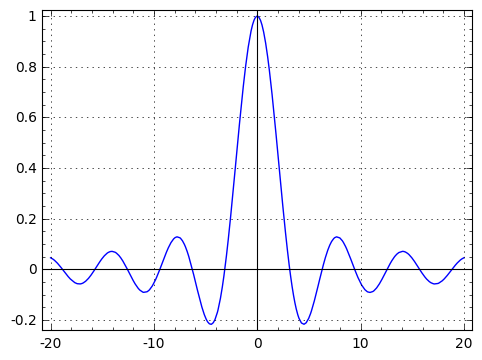

In [31]:
var('y')
plot(sinc(y),-20,20,figsize=5,frame=True,gridlines=True)

## Diffraction pattern

In [32]:
var("th b wl")
def diffrac_pattern(th,b,wl):
    '''
    diffrac_pattern:
    Compute the diffraction pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    '''
    beta=pi*b/wl*sin(th)
    sinus_card=sin(beta)/beta
    return sinus_card^2

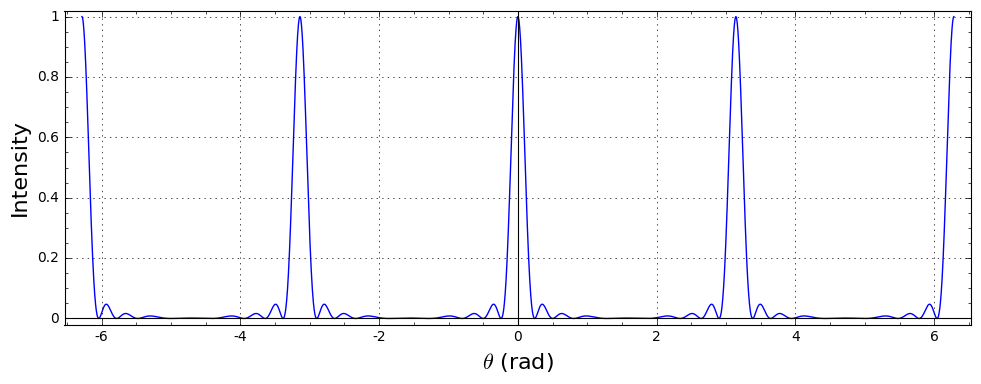

In [33]:
plot(diffrac_pattern(th,b0,wl0),(th,-2*pi,2*pi),figsize=(10,4),frame=True,gridlines=True,plot_points=1000,axes_labels=['$\\theta$ (rad)','Intensity'])

## Interference pattern

In [34]:
var("th a wl N")
def interference_pattern(th,a,wl,N):
    """
    Interference_pattern:
    Compute the diffrac pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    
    """
    
    alpha=pi*(a/wl)*sin(th)
    numer=sin(N*alpha)
    denom=sin(alpha)
    ratio=numer/denom
    return ratio^2/NN^2
   

In [35]:
wl0/a0

0.120000000000000

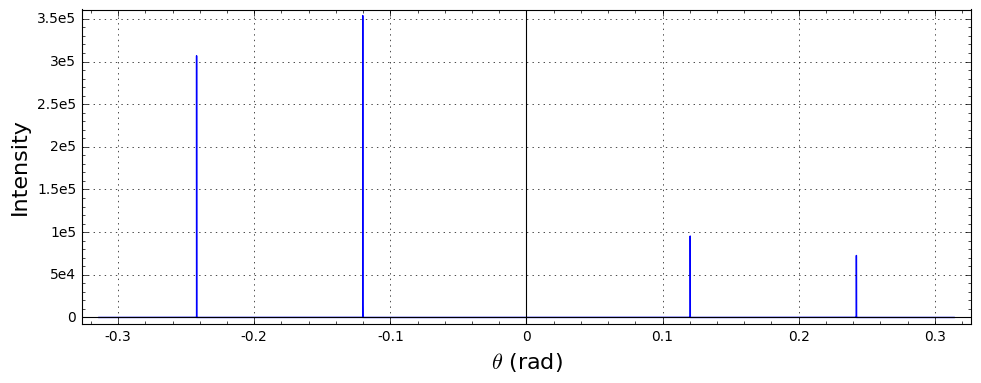

In [36]:
plot(interference_pattern(th,a0,wl0,NN),(th,-pi/10.,pi/10.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,axes_labels=['$\\theta$ (rad)','Intensity'])

## Ronchi Grating Response

In [37]:
var("th a b wl N")
def ronchi_pattern(th,a,b,wl,N):
    prod=diffrac_pattern(th,b,wl)*interference_pattern(th,a,wl,N)
    return prod

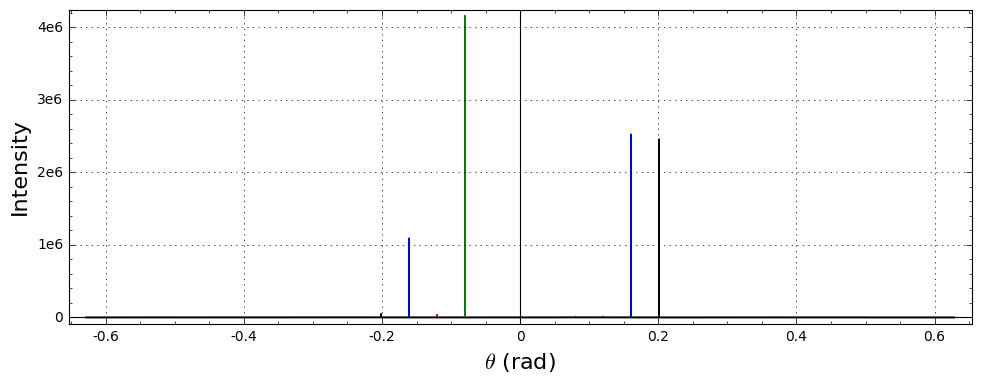

In [38]:
p1=plot(ronchi_pattern(th,a0,b0,wl0,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='red',axes_labels=['$\\theta$ (rad)','Intensity'])
p2=plot(ronchi_pattern(th,a0,b0,wl1,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='blue',axes_labels=['$\\theta$ (rad)','Intensity'])
p3=plot(ronchi_pattern(th,a0,b0,wl2,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='black',axes_labels=['$\\theta$ (rad)','Intensity'])
p4=plot(ronchi_pattern(th,a0,b0,wl3,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='green',axes_labels=['$\\theta$ (rad)','Intensity'])
p1+p2+p3+p4

In [39]:
var("x d a b wl N")
def ronchi_pattern_focalp(x,d,a,b,wl,N):
    """
    ronchi_pattern_focalp(x,d,a,b,wl,N) :
    shows in focal plane
    
    - x and d in same unit (better in mm)
    """
    th=atan(x/d)
    prod=diffrac_pattern(th,b,wl)*interference_pattern(th,a,wl,N)
    return prod

In [ ]:
DD=150 # mm distance of Ronchi to Focal Plane

In [ ]:
p1=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl0,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='red',axes_labels=['x (mm)','Intensity'])
p2=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl1,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='blue',axes_labels=['x (mm)','Intensity'])
p3=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl2,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='black',axes_labels=['x (mm)','Intensity'])
p4=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl3,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='green',axes_labels=['x (mm)','Intensity'])
p1+p2+p3+p4

## Optics

In [ ]:
I_order0= limit(ronchi_pattern(x,a0,b0,wl0,NN),x=0)

In [ ]:
print "Relative Intensity at order 0 = I0=", I_order0

In [ ]:
I_order_p1=n(limit(ronchi_pattern(x,a0,b0,wl0,NN),x=wl0/a0))
I_order_m1=n(limit(ronchi_pattern(x,a0,b0,wl0,NN),x=-wl0/a0))

In [ ]:
wl0/a0

In [ ]:
print "Relative Intensity at order 1 : I1=", I_order_p1, " , ",I_order_m1

In [ ]:
0.2/0.5